## **Sentiment Analysis**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the data
train = pd.read_csv('/content/drive/MyDrive/train_tweet.csv')
test = pd.read_csv('/content/drive/MyDrive/test_tweets.csv')

In [ ]:
print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [ ]:
train.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [ ]:
test.head()

id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...

In [ ]:
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [ ]:
train[train['label']==0]

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31956  31957      0  off fishing tomorrow @user carnt wait first ti...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31961  31962      0                   thank you @user for you follow  

[29720 rows x 3 columns]

In [ ]:
train[train['label']==1]

id  label                                              tweet
13        14      1  @user #cnn calls #michigan middle school 'buil...
14        15      1  no comment!  in #australia   #opkillingbay #se...
17        18      1                             retweet if you agree! 
23        24      1    @user @user lumpy says i am a . prove it lumpy.
34        35      1  it's unbelievable that in the 21st century we'...
...      ...    ...                                                ...
31934  31935      1  lady banned from kentucky mall. @user  #jcpenn...
31946  31947      1  @user omfg i'm offended! i'm a  mailbox and i'...
31947  31948      1  @user @user you don't have the balls to hashta...
31948  31949      1   makes you ask yourself, who am i? then am i a...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...

[2242 rows x 3 columns]

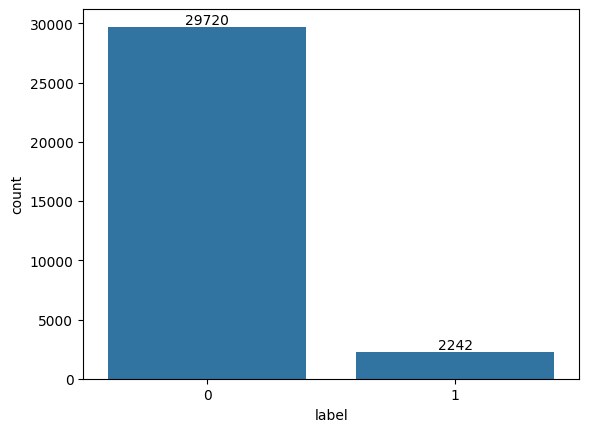

In [ ]:
# plot data for distribution

ax = sns.countplot(data=train, x='label')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
train['length'] = train['tweet'].str.len()
train.head()

id  label                                              tweet  length
0   1      0   @user when a father is dysfunctional and is s...     102
1   2      0  @user @user thanks for #lyft credit i can't us...     122
2   3      0                                bihday your majesty      21
3   4      0  #model   i love u take with u all the time in ...      86
4   5      0             factsguide: society now    #motivation      39

In [ ]:
# stats

train.groupby('label')['length'].describe()

count       mean        std   min   25%   50%    75%    max
label                                                               
0      29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0
1       2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

In [ ]:
# 30 most frequently repeated words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

word_freq = [ ( word, sum_words[0,i] ) for word, i in cv.vocabulary_.items()]

word_frq = sorted(word_freq, key = lambda x:x[1], reverse=True)

frequency = pd.DataFrame(word_frq, columns= ['word', 'frequency'])
frequency.head()

word  frequency
0   user      17577
1   love       2749
2    day       2311
3    amp       1776
4  happy       1686

In [ ]:
frequency

word  frequency
0          user      17577
1          love       2749
2           day       2311
3           amp       1776
4         happy       1686
...         ...        ...
41099       isz          1
41100  airwaves          1
41101    mantle          1
41102   shirley          1
41103   chisolm          1

[41104 rows x 2 columns]

In [ ]:
word_frq

[('user', np.int64(17577)),
 ('love', np.int64(2749)),
 ('day', np.int64(2311)),
 ('amp', np.int64(1776)),
 ('happy', np.int64(1686)),
 ('just', np.int64(1365)),
 ('time', np.int64(1136)),
 ('life', np.int64(1131)),
 ('today', np.int64(1079)),
 ('like', np.int64(1050)),
 ('new', np.int64(997)),
 ('thankful', np.int64(946)),
 ('positive', np.int64(931)),
 ('people', np.int64(874)),
 ('good', np.int64(867)),
 ('bihday', np.int64(845)),
 ('smile', np.int64(712)),
 ('don', np.int64(665)),
 ('want', np.int64(649)),
 ('father', np.int64(635)),
 ('work', np.int64(611)),
 ('healthy', np.int64(604)),
 ('weekend', np.int64(597)),
 ('fun', np.int64(588)),
 ('summer', np.int64(560)),
 ('make', np.int64(550)),
 ('got', np.int64(531)),
 ('family', np.int64(528)),
 ('friday', np.int64(523)),
 ('best', np.int64(516)),
 ('beautiful', np.int64(515)),
 ('great', np.int64(515)),
 ('need', np.int64(510)),
 ('way', np.int64(510)),
 ('friends', np.int64(505)),
 ('bull', np.int64(504)),
 ('going', np.int64(49

In [ ]:
sum_words

matrix([[ 51,  28,   2, ..., 272,   1,   2]])

In [ ]:
sum_words.shape

(1, 41104)

In [ ]:
word_freq

[('user', np.int64(17577)),
 ('father', np.int64(635)),
 ('dysfunctional', np.int64(1)),
 ('selfish', np.int64(13)),
 ('drags', np.int64(4)),
 ('kids', np.int64(204)),
 ('dysfunction', np.int64(3)),
 ('run', np.int64(107)),
 ('thanks', np.int64(310)),
 ('lyft', np.int64(5)),
 ('credit', np.int64(14)),
 ('use', np.int64(114)),
 ('cause', np.int64(73)),
 ('don', np.int64(665)),
 ('offer', np.int64(27)),
 ('wheelchair', np.int64(3)),
 ('vans', np.int64(2)),
 ('pdx', np.int64(3)),
 ('disapointed', np.int64(1)),
 ('getthanked', np.int64(2)),
 ('bihday', np.int64(845)),
 ('majesty', np.int64(10)),
 ('model', np.int64(376)),
 ('love', np.int64(2749)),
 ('time', np.int64(1136)),
 ('urð', np.int64(325)),
 ('factsguide', np.int64(12)),
 ('society', np.int64(27)),
 ('motivation', np.int64(174)),
 ('huge', np.int64(44)),
 ('fan', np.int64(67)),
 ('fare', np.int64(4)),
 ('big', np.int64(197)),
 ('talking', np.int64(67)),
 ('leave', np.int64(136)),
 ('chaos', np.int64(8)),
 ('pay', np.int64(280)),
 

In [ ]:
cv.vocabulary_.items()

dict_items([('user', 38161), ('father', 12981), ('dysfunctional', 11373), ('selfish', 32080), ('drags', 11051), ('kids', 20140), ('dysfunction', 11372), ('run', 31207), ('thanks', 35980), ('lyft', 22203), ('credit', 8964), ('use', 38152), ('cause', 6850), ('don', 10839), ('offer', 26115), ('wheelchair', 39521), ('vans', 38306), ('pdx', 27319), ('disapointed', 10458), ('getthanked', 14989), ('bihday', 4699), ('majesty', 22413), ('model', 23785), ('love', 21856), ('time', 36564), ('urð', 38135), ('factsguide', 12742), ('society', 33470), ('motivation', 24090), ('huge', 17592), ('fan', 12859), ('fare', 12893), ('big', 4637), ('talking', 35449), ('leave', 20907), ('chaos', 7107), ('pay', 27260), ('disputes', 10579), ('allshowandnogo', 2089), ('camping', 6463), ('tomorrow', 36788), ('dannyâ', 9526), ('school', 31755), ('year', 40502), ('exams', 12432), ('think', 36335), ('hate', 16540), ('imagine', 18115), ('actorslife', 1434), ('revolutionschool', 30617), ('girl', 15111), ('won', 40020), (

In [ ]:
cv.vocabulary_

{'user': 38161,
 'father': 12981,
 'dysfunctional': 11373,
 'selfish': 32080,
 'drags': 11051,
 'kids': 20140,
 'dysfunction': 11372,
 'run': 31207,
 'thanks': 35980,
 'lyft': 22203,
 'credit': 8964,
 'use': 38152,
 'cause': 6850,
 'don': 10839,
 'offer': 26115,
 'wheelchair': 39521,
 'vans': 38306,
 'pdx': 27319,
 'disapointed': 10458,
 'getthanked': 14989,
 'bihday': 4699,
 'majesty': 22413,
 'model': 23785,
 'love': 21856,
 'time': 36564,
 'urð': 38135,
 'factsguide': 12742,
 'society': 33470,
 'motivation': 24090,
 'huge': 17592,
 'fan': 12859,
 'fare': 12893,
 'big': 4637,
 'talking': 35449,
 'leave': 20907,
 'chaos': 7107,
 'pay': 27260,
 'disputes': 10579,
 'allshowandnogo': 2089,
 'camping': 6463,
 'tomorrow': 36788,
 'dannyâ': 9526,
 'school': 31755,
 'year': 40502,
 'exams': 12432,
 'think': 36335,
 'hate': 16540,
 'imagine': 18115,
 'actorslife': 1434,
 'revolutionschool': 30617,
 'girl': 15111,
 'won': 40020,
 'land': 20633,
 'allin': 2057,
 'cavs': 6863,
 'champions': 7065

In [ ]:
words[2]

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2 stored elements and shape (1, 41104)>

In [ ]:
cv

CountVectorizer(stop_words='english')

In [ ]:
train.tweet

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

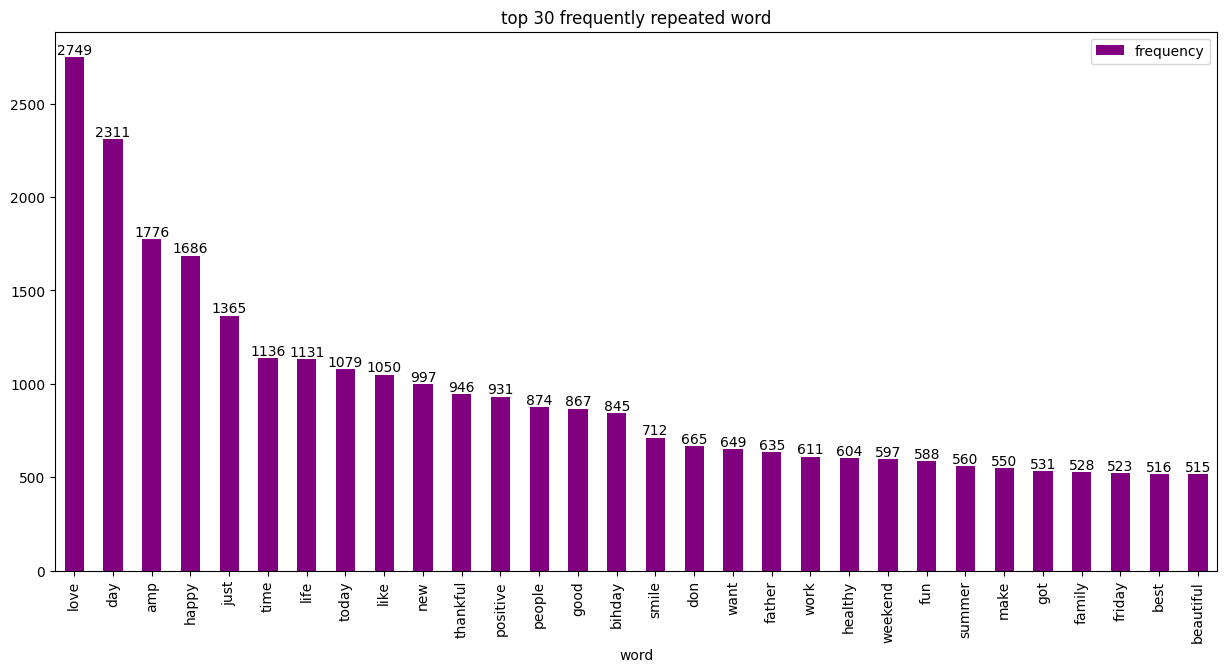

In [ ]:
# plotting word frequency by excluding 'user' because its pii data

freq_plot = frequency.loc[1:30].plot(x='word', y='frequency', kind='bar', figsize=(15,7), color='purple')
freq_plot.bar_label(freq_plot.containers[0])
plt.title('top 30 frequently repeated word')
plt.show()

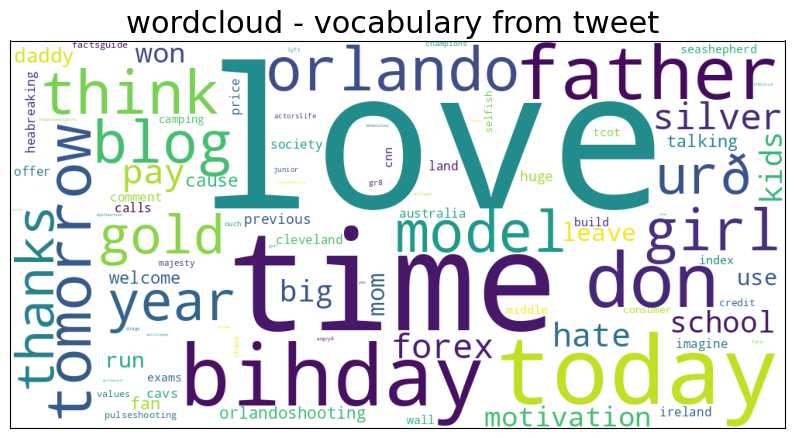

In [ ]:
# word cloud by excluding 'user' as its pii

from wordcloud import WordCloud

wc_plot = WordCloud(background_color = 'white', width = 1000, height =500).generate_from_frequencies(dict(word_freq[1:100]))

plt.figure(figsize=(10,8))
plt.imshow(wc_plot)

plt.title('wordcloud - vocabulary from tweet ', fontsize = 22)
plt.xticks([])
plt.yticks([])
plt.show()

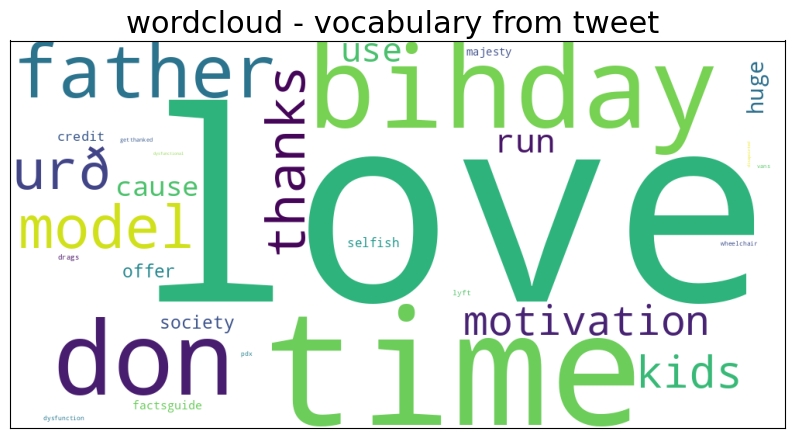

In [ ]:
# word cloud by excluding 'user' as its pii

from wordcloud import WordCloud

wc_plot = WordCloud(background_color = 'white', width = 1000, height =500).generate_from_frequencies(dict(word_freq[1:30]))

plt.figure(figsize=(10,8))
plt.imshow(wc_plot)

plt.title('wordcloud - vocabulary from tweet ', fontsize = 22)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# Remove word '@user' from raw data

train['c_tweets'] = train['tweet'].str.replace(r'@user\b', '', regex=True).str.strip()

In [ ]:
train.head()

id  label                                              tweet  length  \
0   1      0   @user when a father is dysfunctional and is s...     102   
1   2      0  @user @user thanks for #lyft credit i can't us...     122   
2   3      0                                bihday your majesty      21   
3   4      0  #model   i love u take with u all the time in ...      86   
4   5      0             factsguide: society now    #motivation      39   

                                            c_tweets  
0  when a father is dysfunctional and is so selfi...  
1  thanks for #lyft credit i can't use cause they...  
2                                bihday your majesty  
3  #model   i love u take with u all the time in ...  
4             factsguide: society now    #motivation

In [ ]:
normal_words = ' '.join([text for text in train['c_tweets'][train['label']==0]])
normal_words

'when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked bihday your majesty #model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦ factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo camping tomorrow        dannyâ\x80¦ the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ welcome here !  i\'m   it\'s so #gr8 ! â\x86\x9d #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex we are so selfish. #orlando #

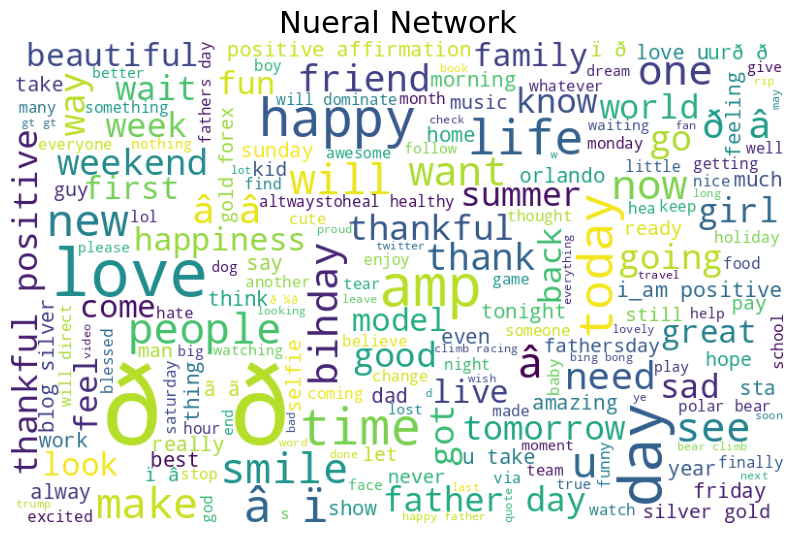

In [ ]:
nwc_plot = WordCloud(background_color = 'white', width = 800, height = 500, random_state=0, max_font_size = 110).generate(normal_words)

plt.figure(figsize = (10,8))

plt.imshow(nwc_plot)
plt.title( 'Nueral Network', fontsize=22)
plt.axis('off')
plt.show()

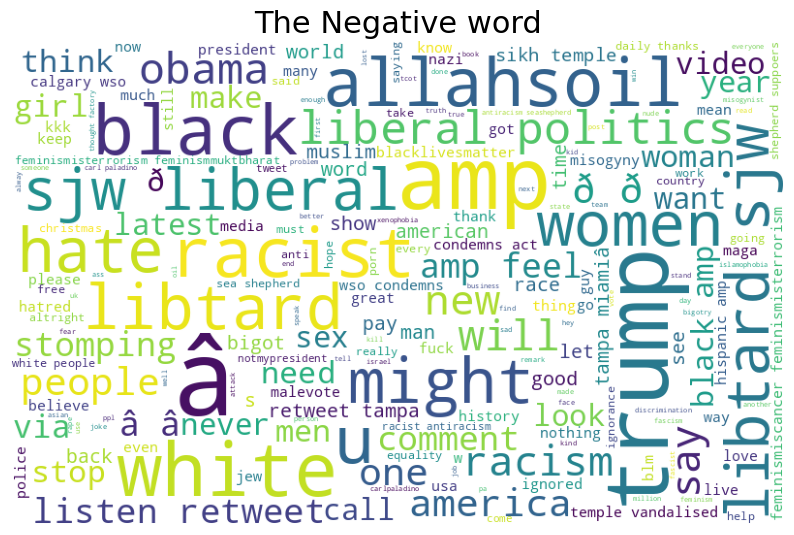

In [ ]:
negative_words = ' '.join([text for text in train['c_tweets'][train['label']==1]])

ntwc_plot = WordCloud(background_color= 'white', width =800, height = 500, random_state =0, max_font_size = 110).generate(negative_words)

plt.figure(figsize = (10,8))
plt.imshow(ntwc_plot)

plt.title('The Negative word', fontsize = 22)
plt.axis('off')
plt.show()

In [ ]:
# function to extract hashtags

def hashtag_extract(x):
    hashtags = []
    import re     # local call

    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtag from nueral network
ht_regular = hashtag_extract(train['c_tweets'][train['label']==0])

ht_negative = hashtag_extract(train['c_tweets'][train['label']==1])

ht_regular = sum(ht_regular, [])

ht_negative = sum(ht_negative, [])

In [ ]:
# Homework

# try to create count plot for top 30 hashtag in positive and negative tweets seperately

In [ ]:
ht_regular

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'gr8',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshooting',
 'orlandoshooting',
 'biggerproblems',
 'selfish',
 'heabreaking',
 'values',
 'love',
 '80days',
 'gettingfed',
 'got7',
 'junior',
 'yugyoem',
 'omg',
 'thankful',
 'positive',
 'friday',
 'cookies',
 'euro2016',
 'badday',
 'coneofshame',
 'cats',
 'pissed',
 'funny',
 'laughs',
 'wine',
 'weekend',
 'tgif',
 'ff',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssas',
 'love',
 'smiles',
 'media',
 'pressconference',
 'antalya',
 'turkey',
 'throwback',
 'ica16',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevibes',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift1

In [ ]:
ht_negative

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphins',
 'thecove',
 'helpcovedolphins',
 'neverump',
 'xenophobia',
 'love',
 'peace',
 'race',
 'identity',
 'medâ',
 'altright',
 'whitesupremacy',
 'linguistics',
 'race',
 'power',
 'raciolinguistics',
 'brexit',
 'people',
 'trump',
 'republican',
 'michelleobama',
 'knicks',
 'golfâ',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'trash',
 'hate',
 'â',
 'stereotyping',
 'prejudice',
 'hope',
 'hate',
 'conflictâ',
 'pols',
 'bluelivesmatter',
 'draintheswamp',
 'ferguson',
 '2016',
 'antisemitism',
 'hocoschools',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatred',
 'bigotry',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'p2',
 'p21',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatter',
 'ushistory',
 'eugenics',
 'biherism',
 'bigotry',
 'altright',
 'potus',
 'theresistance',
 'crime',
 'officerâ',
 'black',
 'retweet',
 'tampa',
 'miamiâ',
 'allahsoil',
 'praised',
 'clevel

In [ ]:
ht_regular

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'gr8',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshooting',
 'orlandoshooting',
 'biggerproblems',
 'selfish',
 'heabreaking',
 'values',
 'love',
 '80days',
 'gettingfed',
 'got7',
 'junior',
 'yugyoem',
 'omg',
 'thankful',
 'positive',
 'friday',
 'cookies',
 'euro2016',
 'badday',
 'coneofshame',
 'cats',
 'pissed',
 'funny',
 'laughs',
 'wine',
 'weekend',
 'tgif',
 'ff',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssas',
 'love',
 'smiles',
 'media',
 'pressconference',
 'antalya',
 'turkey',
 'throwback',
 'ica16',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevibes',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift1

In [ ]:
ht_regular = hashtag_extract(train['c_tweets'])
ht_regular

[['run'],
 ['lyft', 'disapointed', 'getthanked'],
 [],
 ['model'],
 ['motivation'],
 ['allshowandnogo'],
 [],
 ['school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers'],
 ['gr8'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshooting',
  'orlandoshooting',
  'biggerproblems',
  'selfish',
  'heabreaking',
  'values',
  'love'],
 ['80days', 'gettingfed'],
 ['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphins',
  'thecove',
  'helpcovedolphins'],
 ['got7', 'junior', 'yugyoem', 'omg'],
 ['thankful', 'positive'],
 [],
 ['friday', 'cookies'],
 [],
 ['euro2016'],
 ['badday', 'coneofshame', 'cats', 'pissed', 'funny', 'laughs'],
 ['wine', 'weekend'],
 [],
 ['tgif', 'ff', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssas', 'love'],
 ['smiles', 'media', 'pressconference'

In [ ]:
import re



In [ ]:
a='#wrt, rtlm, #gl'
z=re.findall(r'#(\w+)', a)
z

['wrt', 'gl']

In [ ]:
ht_regular = sum(ht_regular, [])

ht_negative = sum(ht_negative, [])

print(ht_regular)
print(ht_negative)


TypeError: can only concatenate list (not "str") to list

In [ ]:
ht_negative

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphins',
 'thecove',
 'helpcovedolphins',
 'neverump',
 'xenophobia',
 'love',
 'peace',
 'race',
 'identity',
 'medâ',
 'altright',
 'whitesupremacy',
 'linguistics',
 'race',
 'power',
 'raciolinguistics',
 'brexit',
 'people',
 'trump',
 'republican',
 'michelleobama',
 'knicks',
 'golfâ',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'trash',
 'hate',
 'â',
 'stereotyping',
 'prejudice',
 'hope',
 'hate',
 'conflictâ',
 'pols',
 'bluelivesmatter',
 'draintheswamp',
 'ferguson',
 '2016',
 'antisemitism',
 'hocoschools',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatred',
 'bigotry',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'p2',
 'p21',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatter',
 'ushistory',
 'eugenics',
 'biherism',
 'bigotry',
 'altright',
 'potus',
 'theresistance',
 'crime',
 'officerâ',
 'black',
 'retweet',
 'tampa',
 'miamiâ',
 'allahsoil',
 'praised',
 'clevel

In [ ]:
ht_regular

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'gr8',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshooting',
 'orlandoshooting',
 'biggerproblems',
 'selfish',
 'heabreaking',
 'values',
 'love',
 '80days',
 'gettingfed',
 'cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphins',
 'thecove',
 'helpcovedolphins',
 'got7',
 'junior',
 'yugyoem',
 'omg',
 'thankful',
 'positive',
 'friday',
 'cookies',
 'euro2016',
 'badday',
 'coneofshame',
 'cats',
 'pissed',
 'funny',
 'laughs',
 'wine',
 'weekend',
 'tgif',
 'ff',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssas',
 'love',
 'smiles',
 'media',
 'pressconference',
 'antalya',
 'turkey',
 'throwback',
 'ica16',
 'rip

In [ ]:
# neural/ positive tweet hashtag

import nltk
a = nltk.FreqDist(ht_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})


In [ ]:
d.head(10)

Hashtag  Count
0             run     33
1            lyft      2
2     disapointed      1
3      getthanked      2
4           model    365
5      motivation    166
6  allshowandnogo      1
7          school     25
8           exams      6
9            hate     56

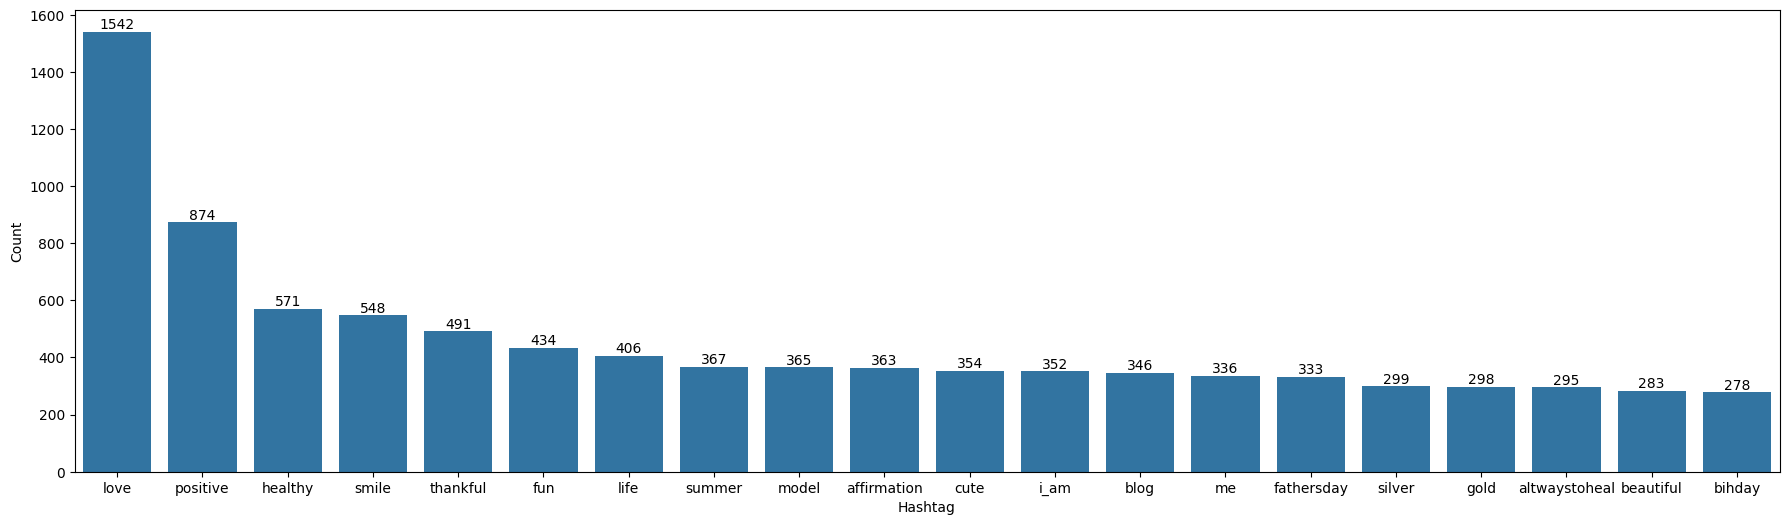

In [ ]:
# top 20 neural words

d = d.nlargest(columns='Count', n=20)
plt.figure(figsize=(22,6))

ax = sns.barplot(data =d, x='Hashtag', y='Count')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
l = d.nlargest(columns='Count', n=20)
l

Hashtag  Count
33            love   1542
49        positive    874
179        healthy    571
231          smile    548
48        thankful    491
198            fun    434
432           life    406
242         summer    367
4            model    365
106    affirmation    363
403           cute    354
105           i_am    352
21            blog    346
264             me    336
525     fathersday    333
22          silver    299
23            gold    298
178  altwaystoheal    295
456      beautiful    283
114         bihday    278

In [ ]:
s = d.nsmallest(columns='Count', n=20)
s

Hashtag  Count
114         bihday    278
456      beautiful    283
178  altwaystoheal    295
23            gold    298
22          silver    299
525     fathersday    333
264             me    336
21            blog    346
105           i_am    352
403           cute    354
106    affirmation    363
4            model    365
242         summer    367
432           life    406
198            fun    434
48        thankful    491
231          smile    548
179        healthy    571
49        positive    874
33            love   1542

# ** Preparing our data for NLP model**

In [ ]:
import re
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# remove unwanted column

del train['c_tweets']

In [ ]:
train.head()


id  label                                              tweet  length
0   1      0   @user when a father is dysfunctional and is s...     102
1   2      0  @user @user thanks for #lyft credit i can't us...     122
2   3      0                                bihday your majesty      21
3   4      0  #model   i love u take with u all the time in ...      86
4   5      0             factsguide: society now    #motivation      39

In [ ]:
# pre proessing for train data

train_corpus = []

for i in range (0, len(train)):
    review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()

    # Stemming

    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]

    # join word into string

    review = ' '.join(review)
    train_corpus.append(review)

In [ ]:

train_corpus = []

for i in range (0, len(train)):
    review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()

    # Stemming

    review2 = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    print(review2)

In [ ]:
# pre proessing for train data

train_corpus = []

for i in range (0, len(train)):
    review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()

    # Stemming

    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]

    # join word into string

    review3 = ' '.join(review)
    print(review3)
    train_corpus.append(review)

In [ ]:
train_corpus = []

for i in range (0, len(train)):
    review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
    review = review.lower()
    review1 = review.split()
    print(review1)


In [ ]:
print(review1)

In [ ]:
print(review1[5])

In [ ]:
ps = PorterStemmer()

    # Stemming

review12 = [ps.stem(word) for word in review1 if word not in set(stopwords.words('english'))]
review12

In [ ]:
# preperocesing for train data

train_corpus = []

for i in range(0, len(train)):
    review = re.sub('[^a-zA-Z]', " ", train['tweet'][i])
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()

    # stemming
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]

    # joining the words into string
    review = ' '.join(review)
    train_corpus.append(review)

In [ ]:
  # Bow for training

  from sklearn.feature_extraction.text import CountVectorizer

  cv = CountVectorizer(max_features=2500)
  x = cv.fit_transform(train_corpus).toarray()
  y = train.iloc[:, 1]

  print(x)
  print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64


In [ ]:
print(x[1])

[0 0 0 ... 0 0 0]


In [ ]:
x[1, :]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [ ]:
# split data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(22373, 2500)
(22373,)
(9589, 2500)
(9589,)


In [ ]:
x_train[1, :]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# standardization

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [ ]:
# Naive Bayes as NLP Model

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import ConfusionMatrixDisplay, f1_score, classification_report

# model

nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)


MultinomialNB()

In [ ]:
y_pred_nb = nb_model.predict(x_test)
y_pred_nb

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
nb_model.score(x_train, y_train)
nb_model.score(x_test,y_test)

0.9510897903848159

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, classification_report

f1_score(y_test, y_pred_nb)

0.5896762904636921

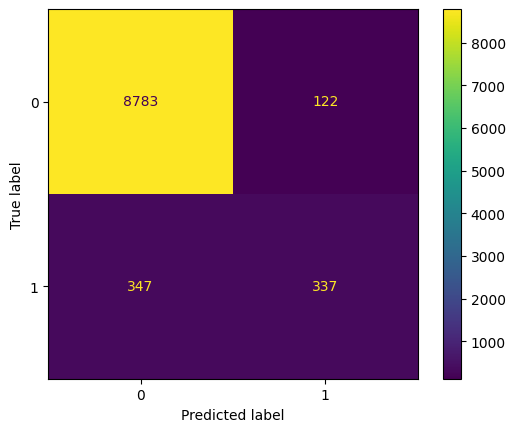

In [ ]:
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred_rf = model_rf.predict(x_test)
y_pred_rf

array([0, 0, 0, ..., 0, 1, 0])

training accuracy: 0.999150762079292
testing accuracy: 0.948795494837835
F1 Score: 0.5891213389121339
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8905
           1       0.69      0.51      0.59       684

    accuracy                           0.95      9589
   macro avg       0.83      0.75      0.78      9589
weighted avg       0.94      0.95      0.95      9589



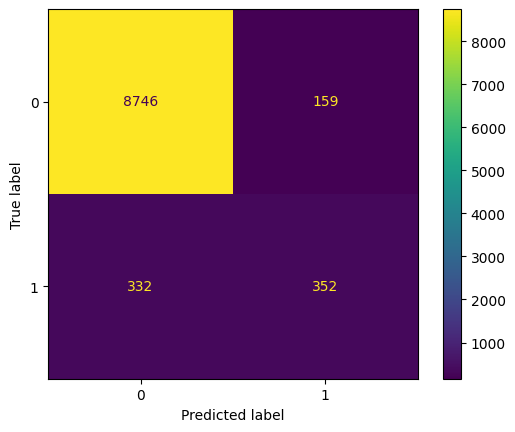

In [ ]:
print('training accuracy:', model_rf.score(x_train, y_train))
print('testing accuracy:', model_rf.score(x_test, y_test))

# metrics
print('F1 Score:', f1_score(y_test, y_pred_rf))
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf))